In [15]:
import numpy as np 
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalAveragePooling1D, Dropout
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from keras.datasets import imdb
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words= 10000)

In [7]:
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((25000,), (25000,), (25000,), (25000,))

In [8]:
list_len = [len(i) for i in train_data]
max(list_len)

2494

In [9]:
from keras.preprocessing.sequence import pad_sequences
train_data = pad_sequences(train_data,
                          value = 0,
                          padding ='post',
                          maxlen = 2494)

In [11]:
test_data = pad_sequences(test_data,
                         value = 0,
                         padding = 'post',
                         maxlen = 2494)

In [16]:
x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size= 0.2, random_state = 4, stratify  = train_label )

In [34]:
def build_model(units= 64):
  model = Sequential()
  model.add(Embedding(10000, 16))
  model.add(GlobalAveragePooling1D())
  model.add(Dense(units, activation = 'relu'))
  model.add(Dense(units, activation = 'relu'))
  model.add(Dense(1,  activation = 'sigmoid'))
  return model

In [ ]:
model = build_model()
model.compile(loss = 'binary_crossentropy',
               optimizer = 'rmsprop',
               metrics = ['accuracy'])
model.summary()
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 512)
model.evaluate(test_data, test_label)

In [73]:
initial_val_loss = history.history['val_loss']
epochs =range(1, len(initial_val_loss)+1)

<function matplotlib.pyplot.show>

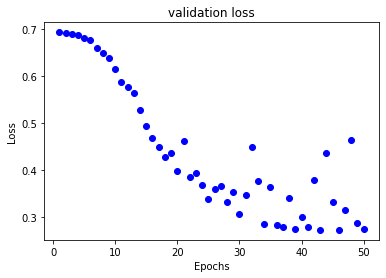

In [74]:
plt.plot(epochs, initial_val_loss, 'bo')
plt.title('validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show

In [ ]:
model = build_model(units = 4)
model.compile(loss = 'binary_crossentropy',
               optimizer = 'rmsprop',
               metrics = ['accuracy'])
model.summary()
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 21, batch_size = 512)
model.evaluate(test_data, test_label)

In [54]:
val_loss = history.history['val_loss']
epochs =range(1, len(val_loss)+1)

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

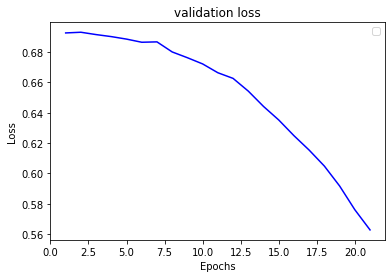

In [55]:
plt.plot(epochs, val_loss, 'b')
plt.title('validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

In [57]:
from keras.regularizers import l2

In [ ]:
model = Sequential()
model.add(Embedding(10000, 16))
model.add(GlobalAveragePooling1D())
model.add(Dense(64, kernel_regularizer = l2(0.001), activation = 'relu'))
model.add(Dense(64, kernel_regularizer = l2(0.001), activation = 'relu'))
model.add(Dense(1,  activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
               optimizer = 'rmsprop',
               metrics = ['accuracy'])

history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 512)
model.evaluate(test_data, test_label)

<function matplotlib.pyplot.show>

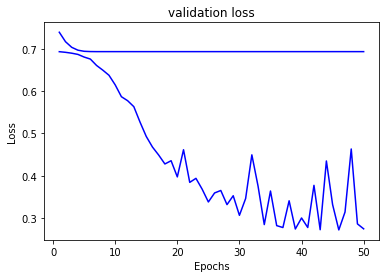

In [77]:
val_loss = history.history['val_loss']
epochs =range(1, len(val_loss)+1)

plt.plot(epochs, val_loss, 'b')
plt.plot(epochs, initial_val_loss, 'b-')
plt.title('validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.show

In [ ]:
 model = Sequential()
model.add(Embedding(10000, 16))
model.add(GlobalAveragePooling1D())
model.add(Dense(units, activation = 'relu'))
model.add(Dropou(0.5))
model.add(Dense(units, activation = 'relu'))
model.add(Dropou(0.5))
model.add(Dense(1,  activation = 'sigmoid'))